<a href="https://colab.research.google.com/github/tamayzengin/Machine-learning-algorhythms/blob/main/Breast_Cancer_Wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset and package setup**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/DATA

/content/drive/MyDrive/Colab Notebooks/DATA


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('breast_cancer.csv')

In [ ]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
df['Class'].unique()

array([2, 4])

In [ ]:
df = df.drop('Sample code number',axis=1)

##Setting up model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

In [ ]:
X = df.drop('Class',axis=1)
y= df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
base_elastic_net_model = ElasticNet()

In [ ]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1,.5,.7,.95,.99,1]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_model = GridSearchCV(estimator=base_elastic_net_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [ ]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [ ]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [ ]:
y_pred = grid_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [ ]:
log_model.coef_

array([[1.18565367, 0.18586999, 0.70737719, 0.59957322, 0.02328032,
        1.5127378 , 1.03450985, 0.52025279, 0.74539393]])

In [ ]:
y_pred=log_model.predict_proba(scaled_X_train)

In [ ]:
y_pred= log_model.predict(scaled_X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


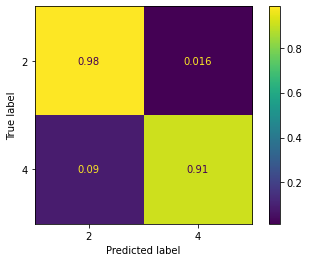

In [ ]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true');

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.95      0.98      0.97       127
           4       0.97      0.91      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205

